# Modeling of Chemical Kinetics

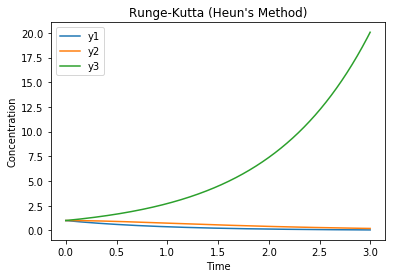

In [43]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
dt = 0.001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 3

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0, end_time, dt)

# intialize empty list for y1, y2, and y3
y1 = []
y2 = []
y3 = []


def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

def dy1(y1):
    return -1*k1*y1

def dy2(y1,y2):
    return k1*y1 - k2*y2

def dy3(y2):
    return k2*y2

def next_point(prev, k1, k2):
    return prev + 0.5 * (k1 + k2)

"""" definition of rate constants """
# rate constant, k1
k1 = 1.0
# rate constant, k2
k2 = 1.0

# initial concentrations of y1, y2, and y3
y1.append(1.0)
y2.append(1.0)
y3.append(1.0)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
      
    y1_k1 = dy1(y1[index-1]) * dt
    y1_k2 = dy1(y1[index-1] + y1_k1) * dt
    y2_k1 = dy2(y1[index-1], y2[index-1])*dt
    y2_k2 = dy2(y1[index-1] + y1_k1, y2[index-1] + y2_k1) * dt
    y3_k1 = dy3(y3[index-1]) * dt
    y3_k2 = dy3(y3[index-1] + y3_k1) * dt
    
    next_y1 = next_point(y1[index-1], y1_k1, y1_k2)
    next_y2 = next_point(y2[index-1], y2_k1, y2_k2)
    next_y3 = next_point(y3[index-1], y3_k1, y3_k2)

    y1.append(next_y1)
    y2.append(next_y2)
    y3.append(next_y3)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, y1)
    plt.plot(t, y2)
    plt.plot(t, y3)
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend(('y1', 'y2', 'y3'))
    plt.title('Runge-Kutta (Heun\'s Method)')
    plt.show()

    # deterministic phase portrait
    #plt.plot(x,y)
    #plt.xlabel('Fox Population')
    #plt.ylabel('Rabbit Population')
    #plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    #plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, y1)
    plt.plot(t, y2)
    plt.plot(t, y3)
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend(('y1', 'y2', 'y3'))
    plt.title('Euler Method')
    plt.show()

    # stochastic phase portrait
    #plt.plot(x,y)
    #plt.xlabel('Fox Population')
    #plt.ylabel('Rabbit Population')
    #plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    #plt.show()
    
    # noise term visualization
    #noise = []
    #n =[]
    #for sample in range(100):
        #noise.append(StochasticTerm(amp))
        #n.append(sample)

    #plt.plot(n, noise)
    #plt.xlabel('Arbitrary Noise Samples')
    #plt.ylabel('Noise')
    #plt.title('Perturbation to Birth Rate')
    #plt.show()

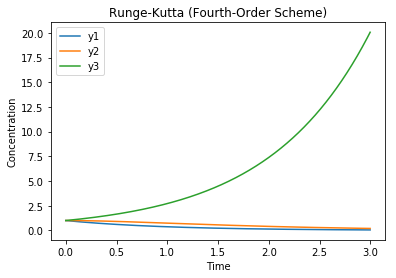

In [47]:
#from scipy.integrate import odeint
#import matplotlib.pyplot as plt
#import numpy as npy
#import random

# timestep determines the accuracy of the euler method of integration
dt = 0.001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 3

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,dt)

# intialize empty list for y1, y2, and y3
y1 = []
y2 = []
y3 = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

def dy1(y1):
    return -1*k1*y1

def dy2(y1,y2):
    return k1*y1 - k2*y2

def dy3(y2):
    return k2*y2

def next_point(prev, k1, k2, k3, k4):
    return prev + (1.0 / 6.0 * (k1 + 2*k2 + 2*k3 + k4))

"""" definition of rate constants """
# rate constant, k1
k1 = 1.0
# rate constant, k2
k2 = 1.0

""" backward euler integration """

# initial concentrations of y1, y2, and y3
y1.append(1.0)
y2.append(1.0)
y3.append(1.0)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    y1_k1 = dy1(y1[index-1]) * dt
    y1_k2 = dy1(y1[index-1] + (y1_k1 / 2)) * dt
    y1_k3 = dy1(y1[index-1] + (y1_k2 / 2)) * dt
    y1_k4 = dy1(y1[index-1] + y1_k3) * dt
    y2_k1 = dy2(y1[index-1], y2[index-1]) * dt
    y2_k2 = dy2(y1[index-1] + (y1_k1 / 2), y2[index-1] + (y2_k1 / 2)) * dt
    y2_k3 = dy2(y1[index-1] + (y1_k2 / 2), y2[index-1] + (y2_k2 / 2)) * dt
    y2_k4 = dy2(y1[index-1] + y1_k3, y2[index-1] + y2_k3) * dt
    y3_k1 = dy3(y3[index-1]) * dt
    y3_k2 = dy3(y3[index-1] + (y3_k1 / 2)) * dt
    y3_k3 = dy3(y3[index-1] + (y3_k2 / 2)) * dt
    y3_k4 = dy3(y3[index-1] + y3_k3) * dt
    
    next_y1 = next_point(y1[index-1], y1_k1, y1_k2, y1_k3, y1_k4)
    next_y2 = next_point(y2[index-1], y2_k1, y2_k2, y2_k3, y2_k4)
    next_y3 = next_point(y3[index-1], y3_k1, y3_k2, y3_k3, y3_k4)

    # add the next value of x and y 
    y1.append(next_y1)
    y2.append(next_y2)
    y3.append(next_y3)

""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, y1)
    plt.plot(t, y2)
    plt.plot(t, y3)
    plt.xlabel('Time')
    plt.ylabel('Concentration')
    plt.legend(('y1', 'y2', 'y3'))
    plt.title('Runge-Kutta (Fourth-Order Scheme)')
    plt.show()